<h1 style="text-align: center;">[Your Project Title]</h1>
<h3 style="text-align: center;">[Your Name]</h3>

---

## **Section 1. Business Context**

**1.1 Context**

Data dari enam kampanye promosi yang dilakukan oleh supermarket X menunjukkan bahwa 27,3% pelanggan telah menerima setidaknya satu kampanye, yang menurut standar Genroe (berdasarkan laporan CustomerGauge) dianggap sebagai performa yang baik karena berada di atas 20%. Namun, tantangan utama terletak pada fakta bahwa setiap kampanye individual hanya mampu menjangkau kurang dari 20% pelanggan, padahal analisis menunjukkan adanya perbedaan signifikan dalam total pengeluaran antara pelanggan yang pernah menerima kampanye dibandingkan dengan yang belum pernah menerima, dengan pelanggan yang pernah menerima kampanye cenderung memiliki total pengeluaran yang lebih tinggi.

**1.2 Problem Statements**

Bagaimana cara meningkatkan tingkat responsivitas pelanggan terhadap kampanye promosi di Supermarket X

**1.3 Key Objective**

1. Identifikasi karakteristik pelanggan yang belum pernah terpapar oleh kampanye promosi.  
2. Tentukan jenis produk yang sering dibeli oleh pelanggan yang belum terlibat dalam kampanye promosi.  
3. Analisis saluran distribusi yang digunakan oleh pelanggan yang belum terpapar oleh kampanye promosi.

## **Section 2. Data Understanding**

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

**2.1 General Information**

In [114]:
df=pd.read_csv(r'D:\Purwadhika\Module 2. Data Analysis\Capstone\supermarket_analysis\data\raw\Supermarket Customers.csv', sep='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [115]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

**2.2 Feature Information**

Berikut adalah penjelasan data:  

**People**  
● ID: Identifikasi unik pelanggan  
● Year_Birth: Tahun kelahiran pelanggan  
● Education: Tingkat pendidikan pelanggan  
● Marital_Status: Status pernikahan pelanggan  
● Income: Pendapatan tahunan rumah tangga pelanggan  
● Kidhome: Jumlah anak di rumah pelanggan  
● Teenhome: Jumlah remaja di rumah pelanggan  
● Dt_Customer: Tanggal pelanggan mulai bergabung dengan perusahaan  
● Recency: Jumlah hari sejak pembelian terakhir pelanggan  
● Complain: 1 jika pelanggan mengajukan keluhan dalam 2 tahun terakhir, 0 jika tidak  

**Products**  
● MntWines: Jumlah uang yang dihabiskan untuk anggur dalam 2 tahun terakhir  
● MntFruits: Jumlah uang yang dihabiskan untuk buah-buahan dalam 2 tahun terakhir  
● MntMeatProducts: Jumlah uang yang dihabiskan untuk produk daging dalam 2 tahun terakhir  
● MntFishProducts: Jumlah uang yang dihabiskan untuk produk ikan dalam 2 tahun terakhir  
● MntSweetProducts: Jumlah uang yang dihabiskan untuk produk manis dalam 2 tahun terakhir  
● MntGoldProds: Jumlah uang yang dihabiskan untuk emas dalam 2 tahun terakhir  

**Promotion**  
● NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon  
● AcceptedCmp1: 1 jika pelanggan menerima penawaran pada kampanye pertama, 0 jika tidak  
● AcceptedCmp2: 1 jika pelanggan menerima penawaran pada kampanye kedua, 0 jika tidak  
● AcceptedCmp3: 1 jika pelanggan menerima penawaran pada kampanye ketiga, 0 jika tidak  
● AcceptedCmp4: 1 jika pelanggan menerima penawaran pada kampanye keempat, 0 jika tidak  
● AcceptedCmp5: 1 jika pelanggan menerima penawaran pada kampanye kelima, 0 jika tidak  
● Response: 1 jika pelanggan menerima penawaran pada kampanye terakhir, 0 jika tidak  

**Place**  
● NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan  
● NumCatalogPurchases: Jumlah pembelian yang dilakukan melalui katalog  
● NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko  
● NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir  

In [116]:
# Menambah Kolom Data 'umur'
current_year = 2014
df['Age'] = current_year - df['Year_Birth']

# Menambah Kolom Data 'total pengeluaran'
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Menambah Kolom Data 'pengelompokan umur'
def cat_age(age):
    if age <= 35:
        return "Young"
    elif 36 <= age <= 50:
        return "MiddleAge"
    elif 51 <= age <= 65:
        return "Mature"
    elif age >= 65:
        return "Senior"
    else:
        return None
df['category_age'] = df['Age'].apply(cat_age)

def cat_income(income, data_income):
    # Hitung kuartil
    q1 = data_income.quantile(0.25)
    q2 = data_income.quantile(0.50)
    q3 = data_income.quantile(0.75)
    
    if income < q1:
        return 'Very Low Income'
    elif income < q2:
        return 'Low Income'
    elif income < q3:
        return 'Medium Income'
    else:
        return 'High Income'

df['category_income'] = df['Income'].apply(lambda x: cat_income(x, df['Income']))

# Menambah Kolom Data 'berapa kali terekspos penawaran'
df['cmpcount'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] +df['Response']

# Menambah Kolom Data 'sudah atau belum terekspos penawaran'
df['cmpstatus'] = df['cmpcount'].apply(lambda x: 'Yes' if x > 0 else 'No')

**2.3 Statistics Summary**

In [117]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spending,cmpcount
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,45.194196,605.798214,0.446875
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,602.249288,0.890543
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,18.000000,5.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,37.000000,68.750000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000,396.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,55.000000,1045.500000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,121.000000,2525.000000,5.000000


,Education,Marital_Status,Dt_Customer,category_age,category_income,cmpstatus
count,2240,2240,2240,2240,2240,2240
unique,5,8,663,4,4,2
top,Graduation,Married,31-08-2012,MiddleAge,High Income,No
freq,1127,864,12,1019,578,1631


## **Section 3. Data Cleaning**

**3.1 Missing Values**

In [118]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
Age                    0.000000
Total_Spending         0.000000
category

<Axes: >

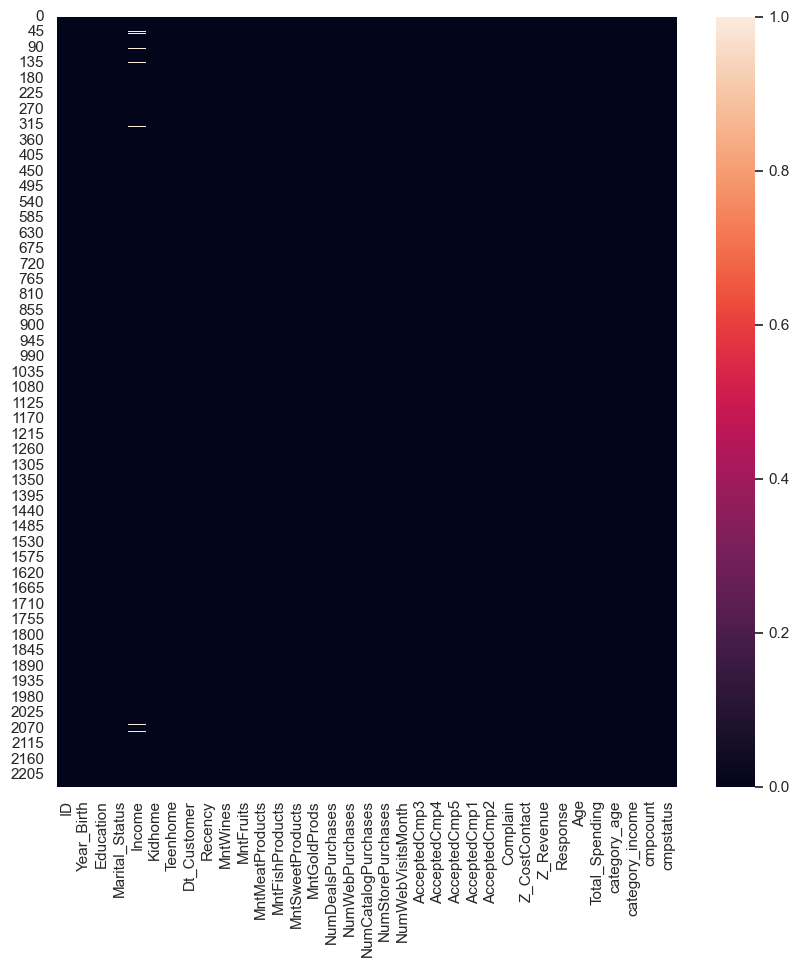

In [119]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

In [120]:
df = df.dropna()
df.shape

(2216, 35)

**3.2 Duplicated Values**

In [121]:
duplicates = df.duplicated()
print(f"Jumlah baris duplikat: {duplicates.sum()}")

Jumlah baris duplikat: 0


**3.3 Incorrect Data Types**

In [122]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Age                      int64
Total_Spending           int64
category_age            object
category

In [123]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year
print(df['Dt_Customer_Year'])

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_Customer_Year, Length: 2216, dtype: int32


**3.4 Inconsistent Values**

In [124]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [125]:
df.Education.replace({"Graduation": "UnderGraduate",
                      "Basic": "High School",
                      "2n Cycle":"Master"},
                      inplace=True)

df.Education.unique()

array(['UnderGraduate', 'PhD', 'Master', 'High School'], dtype=object)

In [126]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [127]:
df.Marital_Status.replace({"Together": "In Relationship",
                           "Married": "In Relationship",
                           "Divorced":"Single",
                           "Widow": "Single",
                           "Alone": "Single",
                           "Absurd": "Single",
                           "YOLO": "Single"},
                           inplace=True)

df.Marital_Status.unique()

array(['Single', 'In Relationship'], dtype=object)

**3.5 Outlier Removal**

<Axes: xlabel='Age', ylabel='Count'>

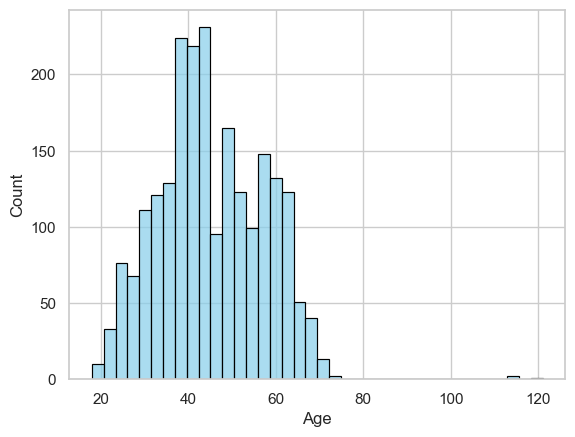

In [128]:
sns.histplot(data=df, 
            x='Age',
            color='skyblue',
            edgecolor='black',
            alpha=0.7)

<Axes: xlabel='Income', ylabel='Count'>

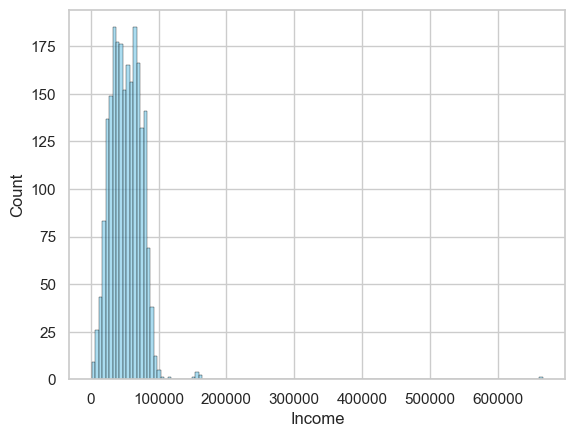

In [129]:
sns.histplot(data=df, 
            x='Income',
            color='skyblue',
            edgecolor='black',
            alpha=0.7)

In [130]:
df = df.loc[df.Year_Birth  >= 1935]
df = df.loc[df.Income  <= 200000]

df.shape

(2212, 36)

**3.6 Drop Unnecessary Columns**

In [131]:
df.drop(['ID', 'Year_Birth','Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [132]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Response,Age,Total_Spending,category_age,category_income,cmpcount,cmpstatus,Dt_Customer_Year
0,UnderGraduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,...,0,0,1,57,1617,Mature,Medium Income,1,Yes,2012
1,UnderGraduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,...,0,0,0,60,27,Mature,Low Income,0,No,2014
2,UnderGraduate,In Relationship,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,49,776,MiddleAge,High Income,0,No,2013
3,UnderGraduate,In Relationship,26646.0,1,0,2014-02-10,26,11,4,20,...,0,0,0,30,53,Young,Very Low Income,0,No,2014
4,PhD,In Relationship,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,0,33,422,Young,Medium Income,0,No,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,UnderGraduate,In Relationship,61223.0,0,1,2013-06-13,46,709,43,182,...,0,0,0,47,1341,MiddleAge,Medium Income,0,No,2013
2236,PhD,In Relationship,64014.0,2,1,2014-06-10,56,406,0,30,...,0,0,0,68,444,Senior,Medium Income,1,Yes,2014
2237,UnderGraduate,Single,56981.0,0,0,2014-01-25,91,908,48,217,...,0,0,0,33,1241,Young,Medium Income,1,Yes,2014
2238,Master,In Relationship,69245.0,0,1,2014-01-24,8,428,30,214,...,0,0,0,58,843,Mature,High Income,0,No,2014


In [133]:
cleaned_file_path = 'cleaned_dataset.csv'
df.to_csv(cleaned_file_path, index=False)

## **Section 4. Analytics**

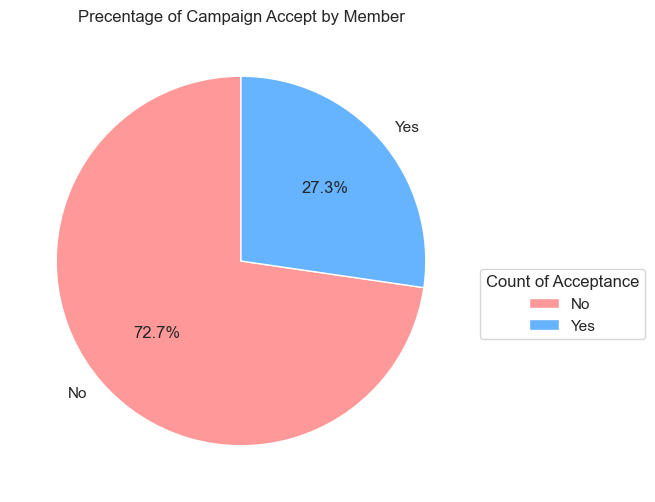

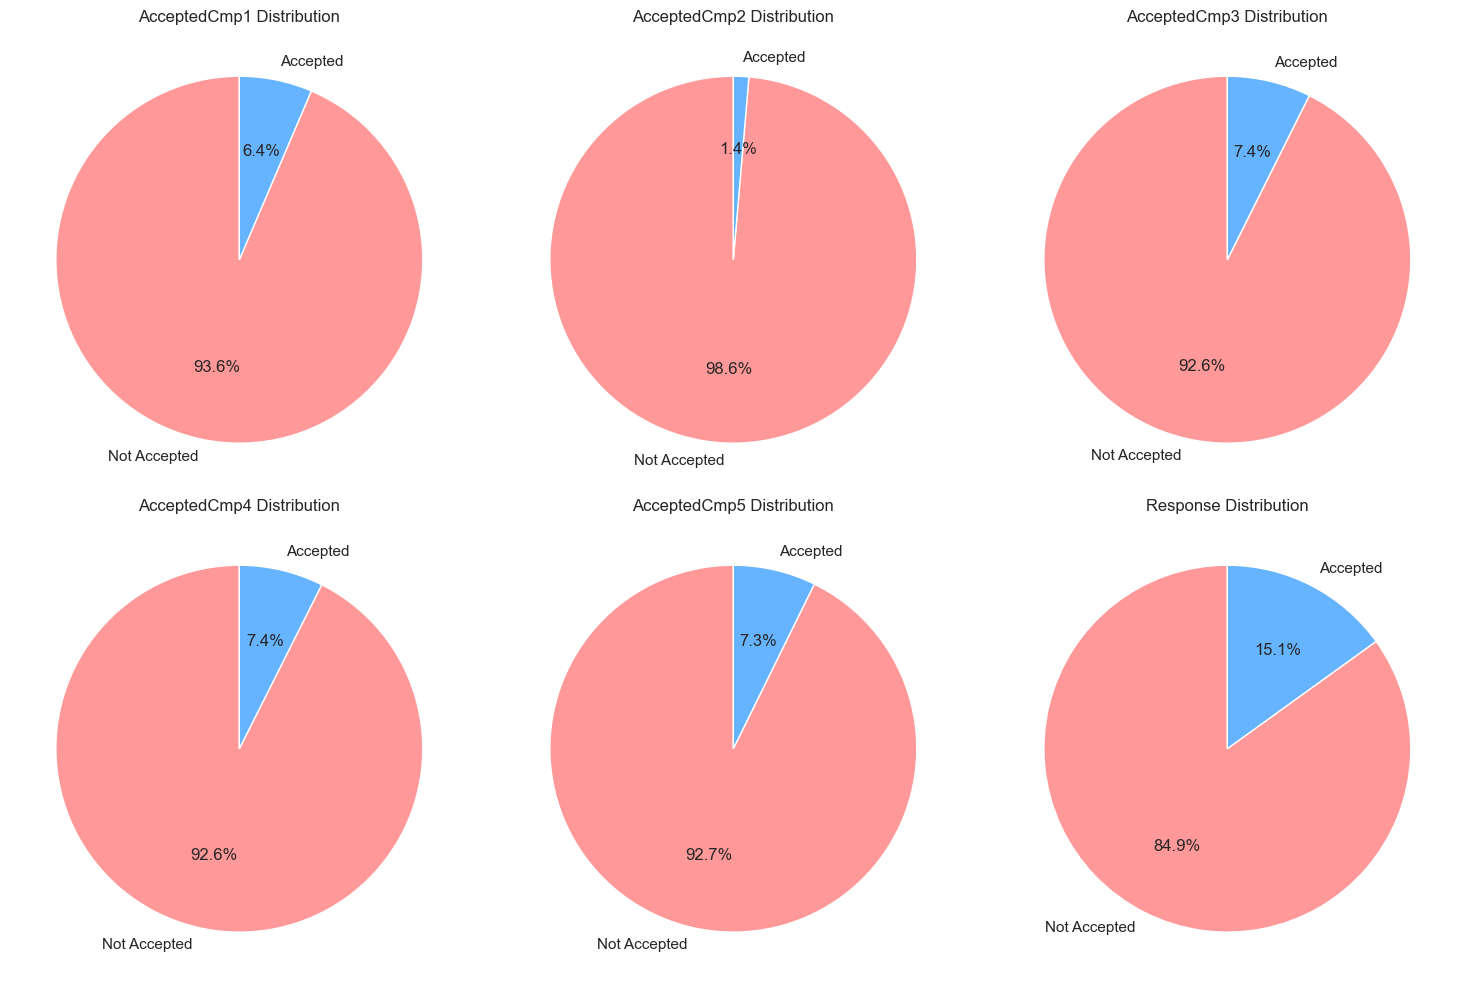

In [134]:
category_counts = df['cmpstatus'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.pie(category_counts, 
        labels=category_counts.index, 
        autopct=lambda p: '{:.1f}%'.format(p) if p > 3 else '',
        startangle=90, 
        colors=[ '#ff9999', '#66b3ff'])

plt.title('Precentage of Campaign Accept by Member')
plt.legend(title="Count of Acceptance", loc="upper left", bbox_to_anchor=(1, 0.5))

# Define the variables to plot
variables = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Create pie charts for each variable
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, var in enumerate(variables):
    # Calculate value counts
    counts = df[var].value_counts(normalize=True)
    labels = counts.index.map({1: 'Accepted', 0: 'Not Accepted'})
    sizes = counts.values

    # Plot pie chart
    ax = axes[i // 3, i % 3]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=[ '#ff9999', '#66b3ff'])
    ax.set_title(f'{var} Distribution')

# Adjust layout
plt.tight_layout()


plt.show()

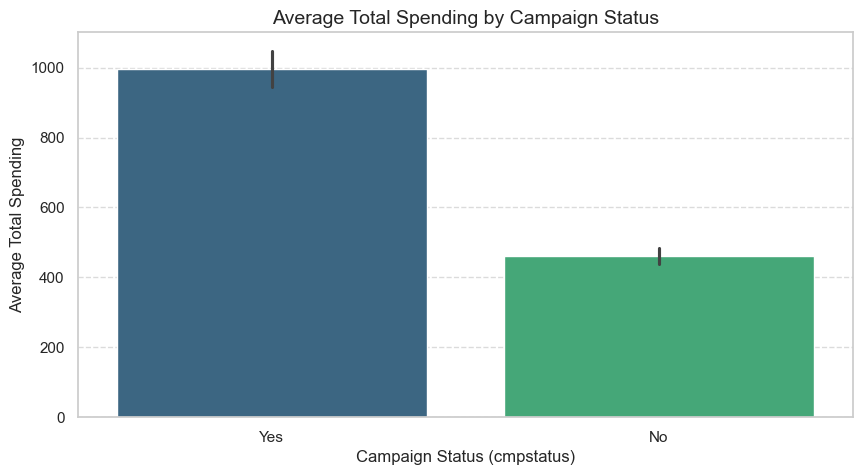

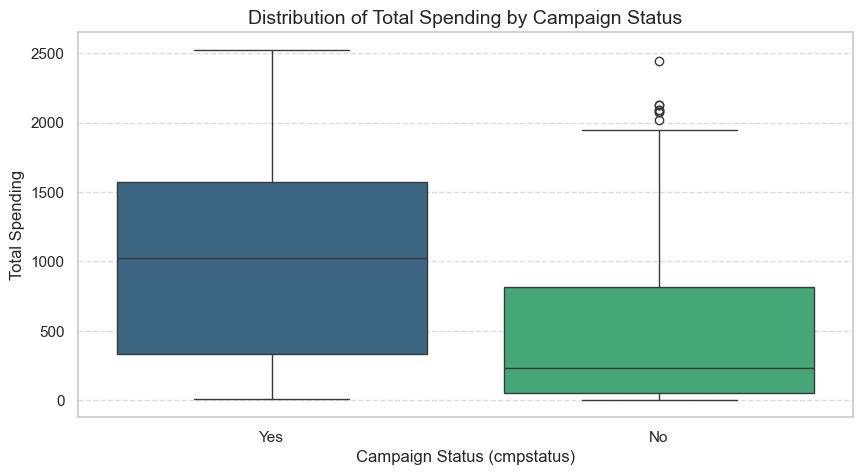

('Mann-Whitney U Test',
 np.float64(715386.0),
 np.float64(4.570515541619499e-66))

In [135]:
# Create bar chart for average Total_Spending by cmpstatus
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='cmpstatus', y='Total_Spending', palette='viridis')
plt.title('Average Total Spending by Campaign Status', fontsize=14)
plt.xlabel('Campaign Status (cmpstatus)', fontsize=12)
plt.ylabel('Average Total Spending', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create box plot for Total_Spending by cmpstatus
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='cmpstatus', y='Total_Spending', palette='viridis')
plt.title('Distribution of Total Spending by Campaign Status', fontsize=14)
plt.xlabel('Campaign Status (cmpstatus)', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Split data into two groups based on cmpstatus
group_yes = df[df['cmpstatus'] == 'Yes']['Total_Spending']
group_no = df[df['cmpstatus'] == 'No']['Total_Spending']

# Perform normality tests (Shapiro-Wilk)
from scipy.stats import shapiro

normal_yes = shapiro(group_yes)
normal_no = shapiro(group_no)

# Select test based on normality results
if normal_yes.pvalue > 0.05 and normal_no.pvalue > 0.05:
    # Perform independent t-test
    test_stat, p_value = ttest_ind(group_yes, group_no, equal_var=False)  # Welch's t-test
    test_type = "T-test (independent, Welch's)"
else:
    # Perform Mann-Whitney U test
    test_stat, p_value = mannwhitneyu(group_yes, group_no, alternative='two-sided')
    test_type = "Mann-Whitney U Test"

test_type, test_stat, p_value

Dengan p-value yang jauh lebih kecil dari 0.05, kita menolak hipotesis nol (H₀) dan menyimpulkan bahwa terdapat perbedaan signifikan dalam Total_Spending antara grup dengan cmpstatus "Yes" dan "No"

### **4.1 Question 1** (Identifikasi karakteristik pelanggan yang belum pernah terpapar oleh kampanye promosi) 

In [136]:
# Split data into two groups based on cmpstatus
group_yes = df[df['cmpstatus'] == 'Yes']
group_no = df[df['cmpstatus'] == 'No']

In [137]:
group_no

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Response,Age,Total_Spending,category_age,category_income,cmpcount,cmpstatus,Dt_Customer_Year
1,UnderGraduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,...,0,0,0,60,27,Mature,Low Income,0,No,2014
2,UnderGraduate,In Relationship,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,49,776,MiddleAge,High Income,0,No,2013
3,UnderGraduate,In Relationship,26646.0,1,0,2014-02-10,26,11,4,20,...,0,0,0,30,53,Young,Very Low Income,0,No,2014
4,PhD,In Relationship,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,0,33,422,Young,Medium Income,0,No,2014
5,Master,In Relationship,62513.0,0,1,2013-09-09,16,520,42,98,...,0,0,0,47,716,MiddleAge,Medium Income,0,No,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,Master,Single,44802.0,0,0,2012-08-21,71,853,10,143,...,0,0,0,44,1049,MiddleAge,Low Income,0,No,2012
2232,UnderGraduate,Single,26816.0,0,0,2012-08-17,50,5,1,6,...,0,0,0,28,22,Young,Very Low Income,0,No,2012
2234,UnderGraduate,In Relationship,34421.0,1,0,2013-07-01,81,3,3,7,...,0,0,0,40,30,MiddleAge,Very Low Income,0,No,2013
2235,UnderGraduate,In Relationship,61223.0,0,1,2013-06-13,46,709,43,182,...,0,0,0,47,1341,MiddleAge,Medium Income,0,No,2013


<Figure size 1000x600 with 0 Axes>

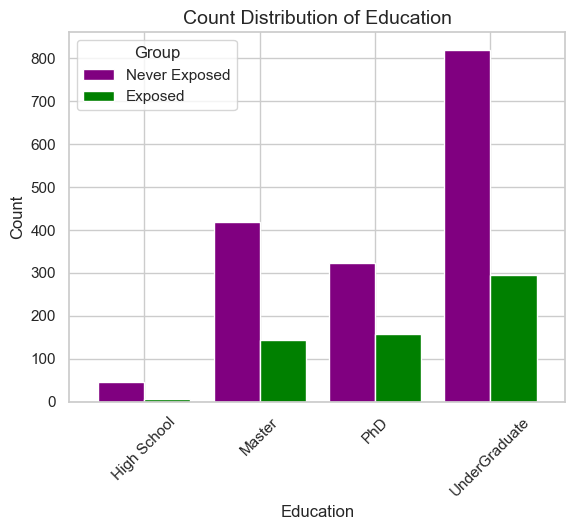

<Figure size 1000x600 with 0 Axes>

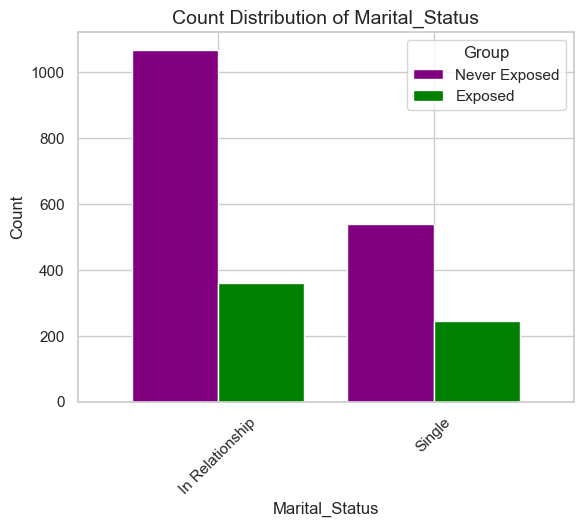

<Figure size 1000x600 with 0 Axes>

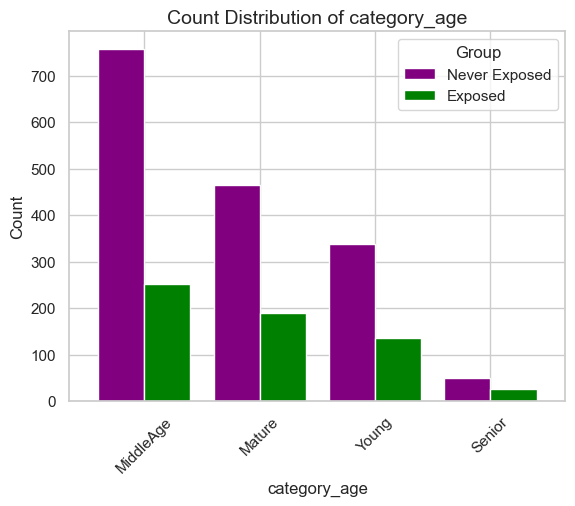

<Figure size 1000x600 with 0 Axes>

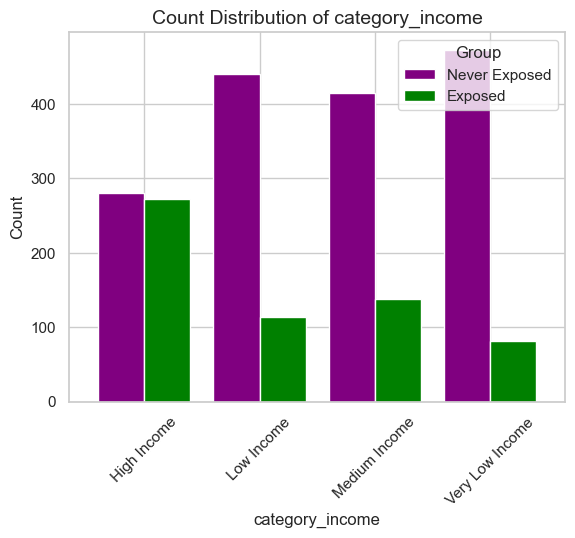

<Figure size 1000x600 with 0 Axes>

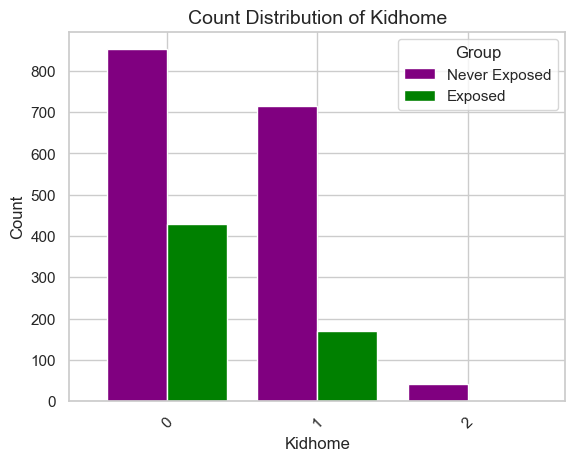

<Figure size 1000x600 with 0 Axes>

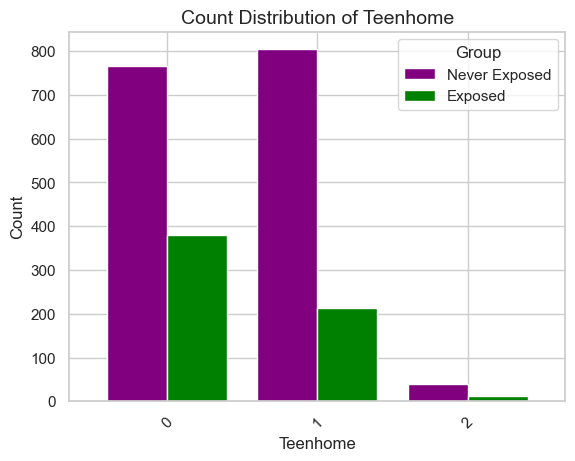

<Figure size 1000x600 with 0 Axes>

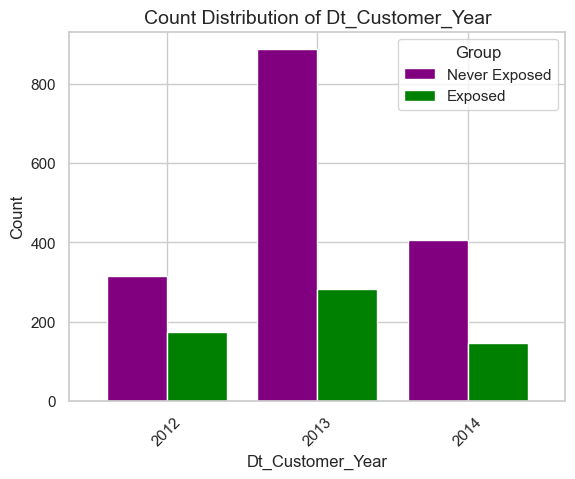

In [139]:
# Calculate count distribution for each demographic variable
def calculate_count_distribution(group, column):
    return group[column].value_counts()

# Variables to compare
variables = ['Education', 'Marital_Status', 'category_age', 'category_income', 'Kidhome', 'Teenhome', 'Dt_Customer_Year']

# Calculate counts for both groups
counts = {
    var: {
        'Never Exposed': calculate_count_distribution(group_no, var),
        'Exposed': calculate_count_distribution(group_yes, var)
    } for var in variables
}

# Visualization
for var, dist in counts.items():
    plt.figure(figsize=(10, 6))
    df_plot = pd.DataFrame(dist).fillna(0)  # Fill missing values with 0 for consistent comparison
    df_plot.plot(kind='bar', stacked=False, color=['purple', 'green'], width=0.8)
    plt.title(f'Count Distribution of {var}', fontsize=14)
    plt.ylabel('Count', fontsize=12)
    plt.xlabel(var, fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Group')
    plt.show()

### **4.2 Question 2**

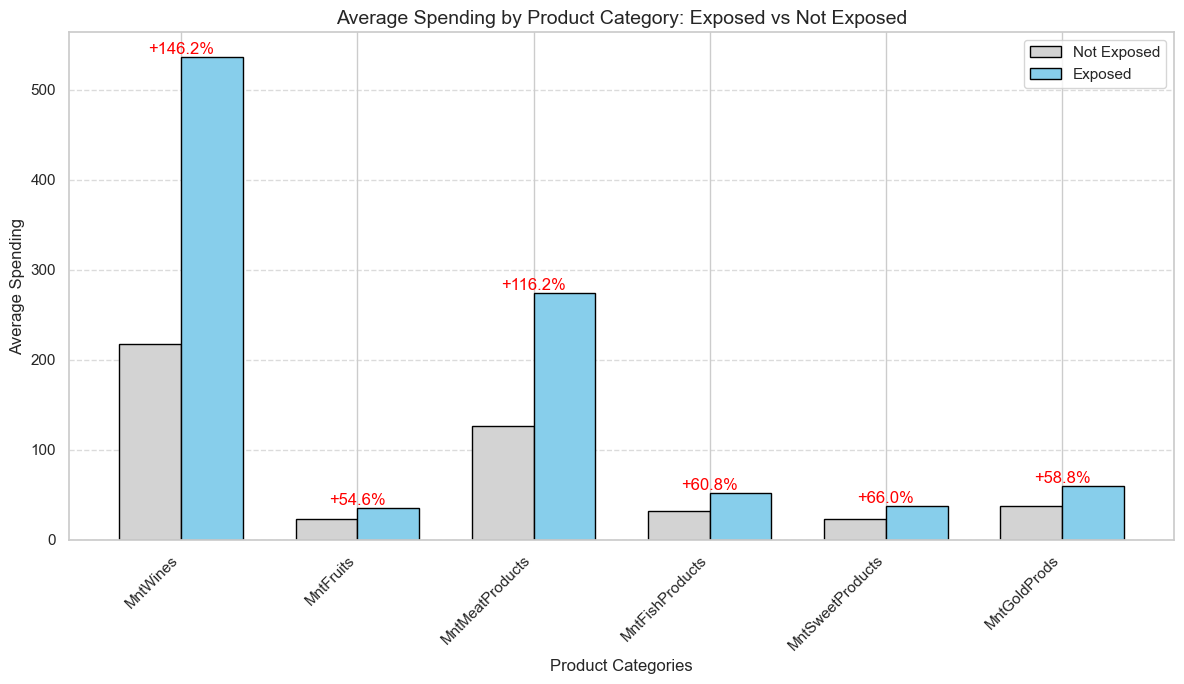

In [140]:
# Define the relevant columns for the analysis
ad_exposure_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create a new column to classify exposure (1 if exposed to any campaign, 0 otherwise)
df['Exposed'] = df[ad_exposure_columns].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# Hitung rata-rata spending untuk setiap produk
average_spending = df.groupby('Exposed')[product_columns].mean()

# Hitung persentase perbedaan
percentage_difference = ((average_spending.loc[1] - average_spending.loc[0]) / average_spending.loc[0]) * 100

# Buat grafik batang berkelompok
plt.figure(figsize=(12, 7))

# Persiapan untuk grafik batang berkelompok
bar_width = 0.35
index = np.arange(len(product_columns))

# Plot batang untuk kelompok tidak terpapar
plt.bar(index - bar_width/2, average_spending.loc[0], bar_width, 
        label='Not Exposed', color='lightgray', edgecolor='black')

# Plot batang untuk kelompok terpapar
plt.bar(index + bar_width/2, average_spending.loc[1], bar_width, 
        label='Exposed', color='skyblue', edgecolor='black')

# Kustomisasi plot
plt.title('Average Spending by Product Category: Exposed vs Not Exposed', fontsize=14)
plt.xlabel('Product Categories', fontsize=12)
plt.ylabel('Average Spending', fontsize=12)
plt.xticks(index, product_columns, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label persentase perbedaan di atas grafik
for i, diff in enumerate(percentage_difference):
    plt.text(index[i], max(average_spending.loc[0][i], average_spending.loc[1][i]), 
             f'+{diff:.1f}%', ha='center', va='bottom', color='red')

plt.tight_layout()
plt.show()

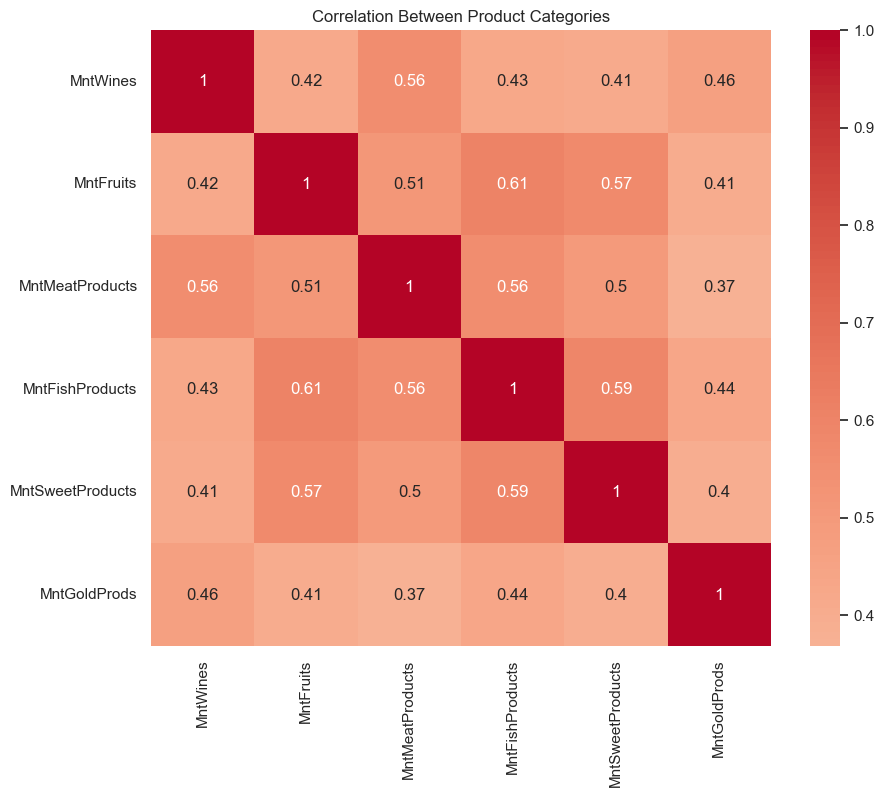

In [141]:
# Correlation matrix antara kategori produk
plt.figure(figsize=(10, 8))
correlation_matrix = group_no[product_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Product Categories')
plt.show()

### **4.3 Question 3**

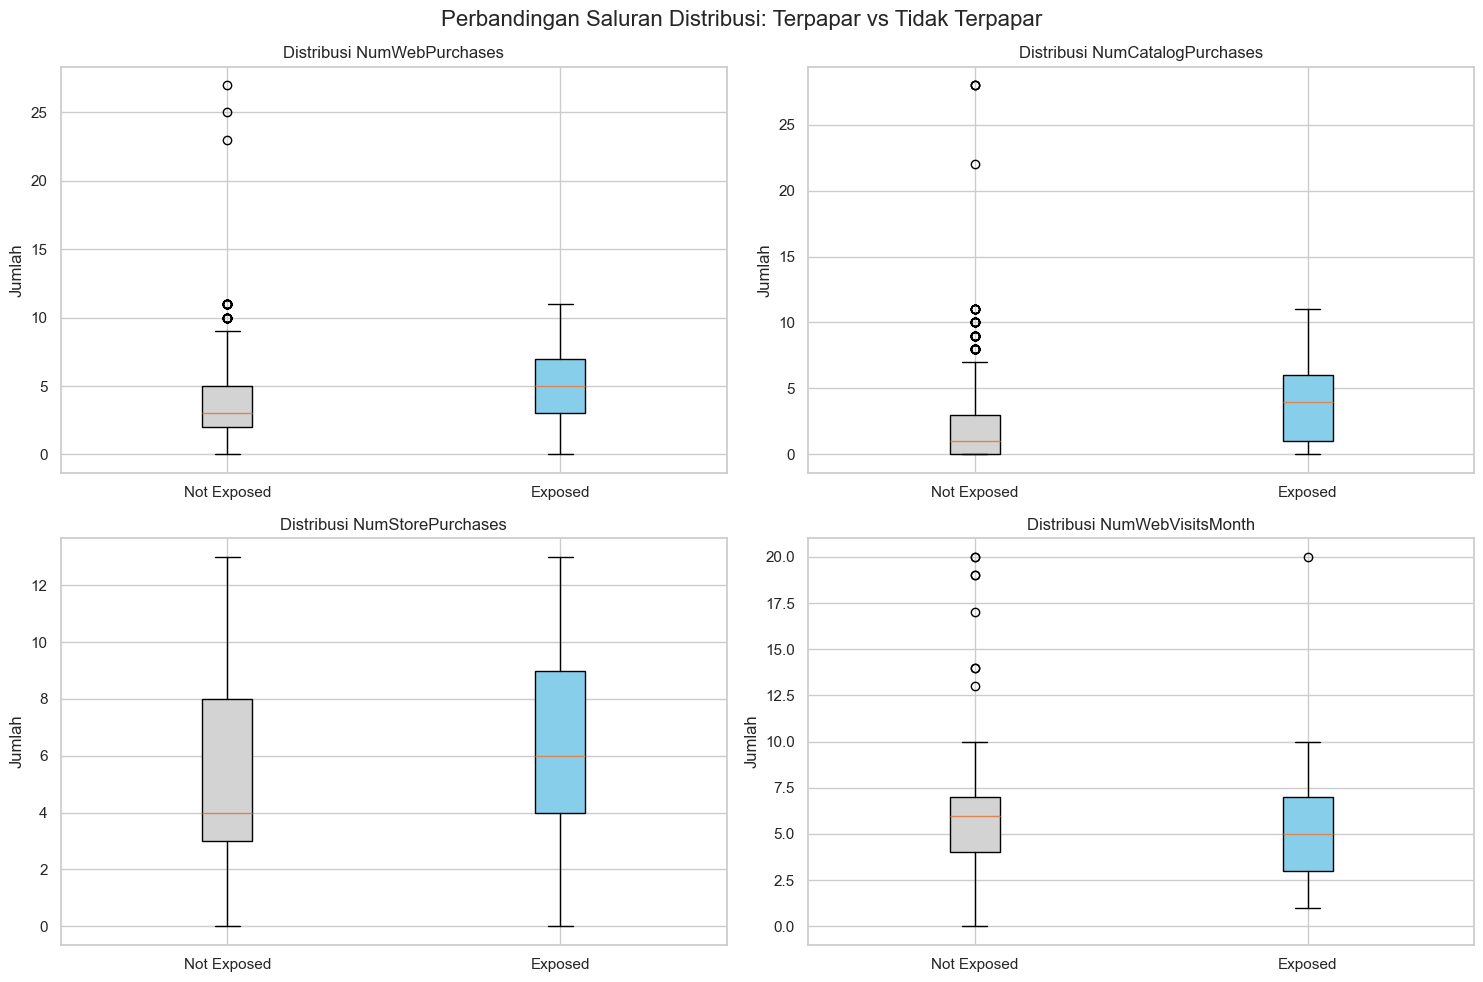

In [150]:
# Definisikan saluran distribusi
distribution_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
distribution_purcahase = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Bagi data menjadi dua kelompok
campaign_data = df[df['cmpstatus'] == 'Yes']
non_campaign_data = df[df['cmpstatus'] == 'No']

# 1. Visualisasi Komparatif: Box Plot
plt.figure(figsize=(15, 10))

for i, channel in enumerate(distribution_channels, 1):
    plt.subplot(2, 2, i)
    data_to_plot = [
        non_campaign_data[channel], 
        campaign_data[channel]
    ]
    
    bp = plt.boxplot(data_to_plot, patch_artist=True, 
                     labels=['Not Exposed', 'Exposed'])
    
    # Warna berbeda untuk setiap kelompok
    colors = ['lightgray', 'skyblue']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    plt.title(f'Distribusi {channel}')
    plt.ylabel('Jumlah')

plt.suptitle('Perbandingan Saluran Distribusi: Terpapar vs Tidak Terpapar', fontsize=16)
plt.tight_layout()
plt.show()

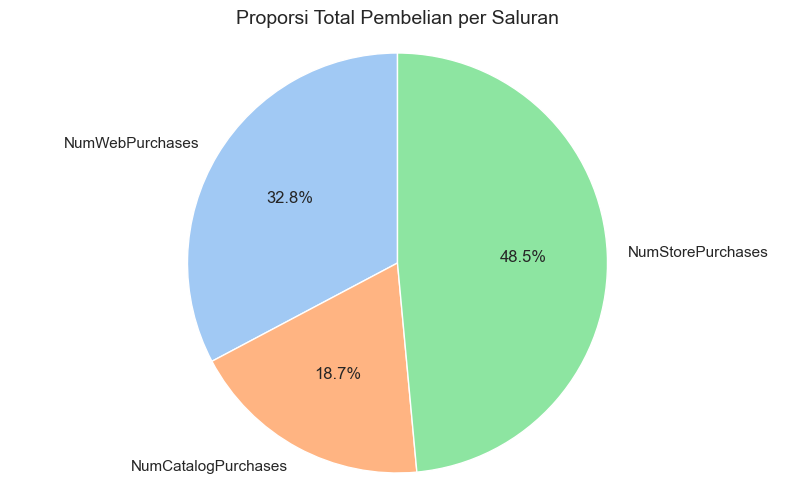

In [151]:
total_purchases = non_campaign_data[distribution_purcahase].sum()
purchase_proportions = total_purchases / total_purchases.sum() * 100

plt.figure(figsize=(10, 6))
plt.pie(purchase_proportions, labels=distribution_purcahase, autopct='%1.1f%%', 
        colors=sns.color_palette('pastel'), startangle=90)
plt.title('Proporsi Total Pembelian per Saluran', fontsize=14)
plt.axis('equal')
plt.show()

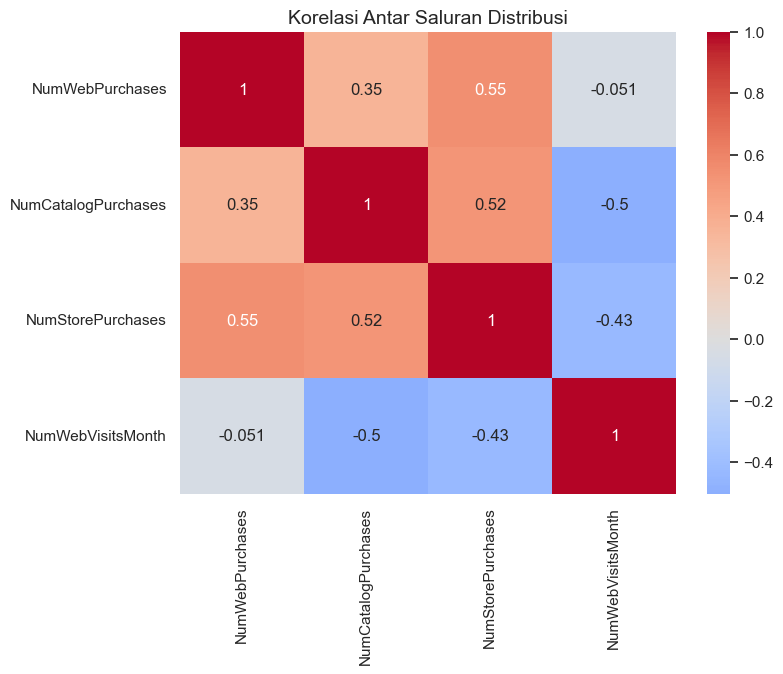

In [147]:
# Hitung korelasi antar saluran
channel_corr = non_campaign_data[distribution_channels].corr()

# Membuat heatmap
plt.figure(figsize=(8, 6))  # Mengatur ukuran plot
sns.heatmap(channel_corr, annot=True, cmap='coolwarm', center=0)

# Menambahkan judul
plt.title('Korelasi Antar Saluran Distribusi', fontsize=14)

# Menampilkan plot
plt.show()

## **Section 5. Conclusion and Recommendation**

**5.1 Conclusion**

**5.2 Recommendation**